# Week 2: Introduction to Machine Learning with linear regression

During this course you will learn how to work with machine learning techniques to build your own smart systems. The first weeks we will focus on supervised learning. This means: learning from examples. In other words: we will feed the computer plenty of examples of inputs and corresponding outputs and we hope that the computer is able to find a relation between input and output.

In the example today we will build a simple mathematical model (a simple linear function) that is able to describe the relationship between the construction year of an appartment and the price of the appartment.

The exercise consists of three steps:
- Getting familiar with Matplotlib. This library will help you to understand and visualize the problem
- Guessing what the solution could be
- Implementing the cost function and finding the best solution

In [11]:
# First we import the libraries that we need
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Config: size of the figures
matplotlib.rcParams['figure.figsize'] = [10, 6]

In [2]:
%%html
<style>
table {margin-left: 0 !important;}
</style>

# Part 1: Understanding matplotlib
It is important to understand some of the fundamentals of Matplotlib, in order to use it effectively. Please study the anatomy of Matplotlib and read the basic information about Matplotlib: 
- https://realpython.com/python-matplotlib-guide/
- https://matplotlib.org/faq/usage_faq.html

![alt text](https://matplotlib.org/_images/anatomy1.png)

### Exercise 1: figure with points and functions
Plot the following data in a figure:
1. Plot the following points in a figure: 
    - (2,5)
    - (8,18) represented with square markers
    - (-6,5) represented with plus markers
    - (-3,-5) represented with star markers
2. Plot the following functions in the figure: 
    - $f(x) = 2x + 3$ in color red
    - $g(x) = \frac{1}{4}x^2 + 5$ in color blue with a dotted line
    - $h(x) = \frac{1}{50}x^3 + 2$ in color orange with a dashed line
3. Draw the X-axis and Y-axis
4. Give the figure a title and name the x-axis and y-axis
5. Draw a legend in the figure

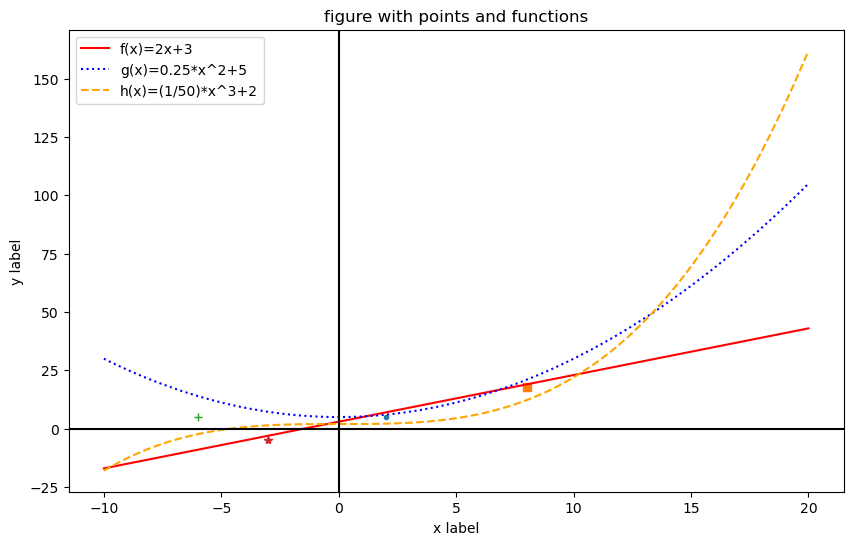

In [3]:
# Your code here
plt.plot(2,5, '.')
plt.plot(8,18, 's')
plt.plot(-6,5, '+')
plt.plot(-3,-5, '*')

x = np.linspace(-10, 20, 100)
y = 2*x+3
g = 0.25*x**2+5
h = (1/50)*x**3+2

plt.plot(x, y, label='f(x)=2x+3', color='red')
plt.plot(x, g, label='g(x)=0.25*x^2+5', color='blue', ls= ':')
plt.plot(x, h, label='h(x)=(1/50)*x^3+2', color='orange', ls= '--')

plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')
plt.title('figure with points and functions')
plt.xlabel('x label')
plt.ylabel('y label')
plt.legend()

plt.show()

### Exercise 2: subplotting
Create one figure with three subplots
1. Plot the following functions in one figure, but in different subplots (next to each other)
    - $f(x) = 2x + 3$ in color red
    - $g(x) = \frac{1}{4}x^2 + 5$ in color blue with a dotted line
    - $h(x) = \frac{1}{50}x^3 + 2$ in color orange with a dashed line
2. Calculate the derivatives for each of the functions and draw them in the same subplot as their original function
3. Show the x-axis and y-axis in all the three graphs

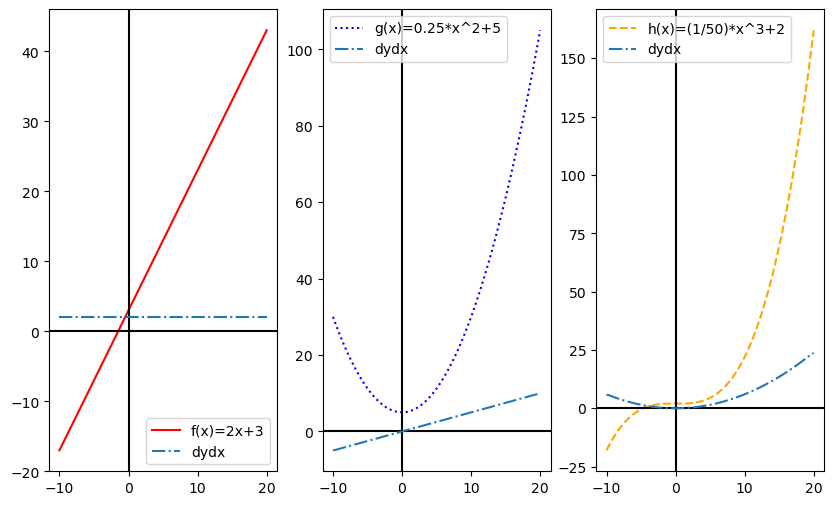

In [4]:
# Your code here
x = np.linspace(-10, 20, 100)
dx = 2
def f(x):
    return 2*x+3
dy = np.gradient(f(x), x)
def g(x):
    return 0.25*x**2+5
dg = np.gradient(g(x), x)
def h(x):
    return (1/50)*x**3+2
dh = np.gradient(h(x), x)


plt.subplot(1,3,1)
plt.plot(x, f(x), label='f(x)=2x+3', color='red')
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')
plt.plot(x, dy, label='dydx', ls='-.')
plt.legend()

plt.subplot(1,3,2)
plt.plot(x, g(x), label='g(x)=0.25*x^2+5', color='blue', ls= ':')
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')
plt.plot(x, dg, label='dydx', ls='-.')
plt.legend()

plt.subplot(1,3,3)
plt.plot(x, h(x), label='h(x)=(1/50)*x^3+2', color='orange', ls= '--')
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')
plt.plot(x, dh, label='dydx', ls='-.')
plt.legend()

# Part 2: Introduction of the regression problem
We will try to find a function that describes the relationship between the year an apartment was constructed and its selling price. The result (also called a model) is a mathematical linear function.

## What is regression
Suppose you are in real estate and you are selling appartments. You expect that there is a clear relationship between the year that the appartment was constructed and the price of the appartment.

| Year of construction (19XX) | Price (in k dollars) |
|----------------------|----------------------|
|32                  |31.7k                 |
|53                  |68.7k                 |
|61                  |62.5k                 |
|...                   |...                   |
|25                  |53.4k                 |

We would like to find the best possible function that describes the relation between construction year and price of the appartment, so that we can use this function in the future for predicting house prices.

In this example we will look for a linear function: $ solution(x) = a.x + b $ where $a$ is the slope and $b$ is the intercept of the function.

### Exercise 3: "guessing" the optimal function
- Plot the data from the data.csv file (use the code below to read the csv file into two lists (x and y values))
- Draw a basic linear function ($f(x) = a.x + b$) with $a = 1$ and $b = 1$
- Find the best values for a and b by changing these values manually

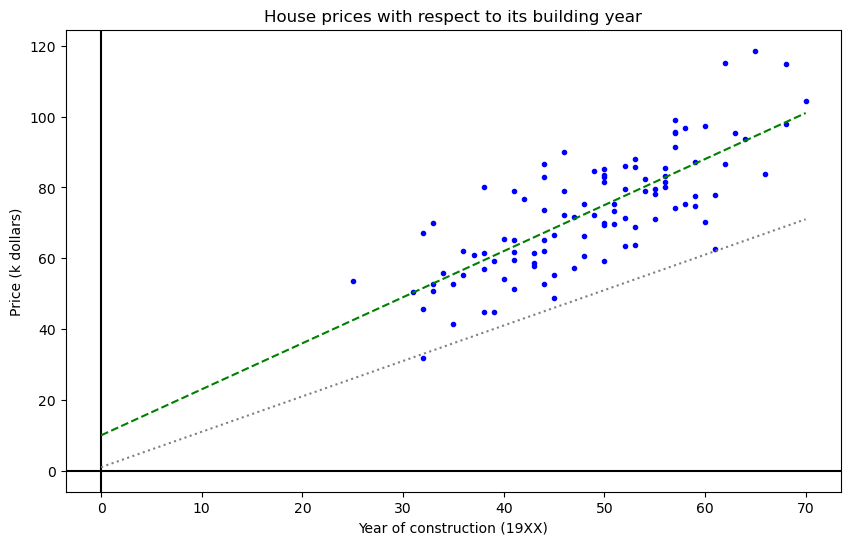

In [5]:
# Read CSV into matrix
data = np.genfromtxt('data.csv', delimiter=',')

# Loop through the rows and split x and y values in two separate lists
x_val = [row[0] for row in data]
y_val = [row[1] for row in data]

# Plot titles and axis information
plt.title('House prices with respect to its building year')
plt.xlabel('Year of construction (19XX)')
plt.ylabel('Price (k dollars)')

# Draw axis
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# Your code here
plt.plot(x_val, y_val, ls= '', color='blue', marker='.')

def f(x):
    return x+1 #basic function of f(x)=ax+b  where a=1 and b=1
x_range = np.linspace(0, 70, 100)
plt.plot(x_range, f(x_range), ls= ':', color='gray', marker='')

def g(x):
    return 1.3*x+10 #basic function of f(x)=ax+b  where a=1 and b=1

plt.plot(x_range, g(x_range), ls= '--', color='green', marker='')



Finding the optimal function by hand is difficult. In general each linear function has the structure $f(x) = a.x + b$. We want to find the perfect $a$ and $b$ so that the function describes our data best. In this homework we will simplify the problem by **assuming that the best possible value for $b = 0$, so that we only have to optimize $a$**.

In order to find the best values for $a$ we need a so called cost function.

## Cost function (Sum of Squared Errors)
A cost function is a function that is able to determine how good your solution is. There are several available cost functions that you could use, but in this example we will use the sum or squared errors.

$$ SSE = \sum_{i=1}^{n} (Y_i - solution(X_i))^2 $$

This formula might look difficult at first, but is actually not that hard to understand. We are trying to determine the difference between the real value (the value from our dataset) and the predicted value (as predicted by our current solution) and sum these values. We square the difference to have no distinction between negative and positive differences.

### Example
First we need to define what our variables mean:
- $n$ is the total number of samples in the dataset
- $X$ is the list of all the inputs (construction year of an apartment)
- $X_i$ is the ith element in the list of input
- $Y$ is the outcome that belongs to each X
- $Y_i$ is the ith outcome (belongs to input $X_i$
- $solution(x) = 1.2x + 0 $ is our current solution (the function we want to optimize with currently $a=1.2$ and $b=0$)

**Sigma notation (sum up)** 

This notation is comparable to a for-loop in programming:

$ \sum_{i=1}^{n}{expression} $

Could be written in Python:

```python
result = 0
for i in range(1, n):
    result += expression
```

For example:
$ \sum_{i=1}^{4}(i) $ means summing all $i$'s in the range 1 up to (and including) 4. 
$$ \sum_{i=1}^{4}(i) = 1 + 2 + 3 + 4 $$

**Our formula can be rewritten as:**
$$ SSE = \sum_{i=1}^{n} (Y_i - solution(X_i))^2 = (Y_1 - solution(X_1))^2 + (Y_2 - solution(X_2))^2 + ... + (Y_n - solution(X_n))^2 $$

**Example using the given dataset**
Given our dataset and the solution (the function that we are trying to evaluate):

|$i$  | $X$ | $Y$ | solution($X_i$)
|---|----------------------|----------------------|----------------------|
|1  |32                  |31.7k                 |38.4|
|2  |53                  |68.7k                 |63.6|
|3  |61                  |62.5k                 |73.2|
|...|...                   |...                   |...
|n  |25                  |53.4k                 |30|


Suppose that we only consider the values for i=1, 2 or 3 (just for the example). The SSE could be calculated as follows:
$$SSE = (31.7 - 38.4)^2 + (68.7 - 63.6)^2 + (62.5 - 73.2)^2 = 185.39 $$


### Exercise 4: implement the SSE function in Python
- Implement the just explained cost function and test with the dataset.

In [6]:
# Your code here
# given that suggestion(x) is the 1.3x+10 

suggestion_x = np.multiply(x_val, 1.3) +10
sse = np.sum((y_val - suggestion_x)**2)
print('SSE:',sse)

SSE: 11048.061077895412


### Now what?
The just calculated value is a value that describes how good our current solution is. By changing the $a$ parameter in our solution function, the cost function will either return a higher or lower number. Each better solution will give a lower cost. In other words: we want to minimize the cost function to find the best possible solution.

### Exercise 5: draw the cost function and find the minimum
- Draw the cost function for different values of $a$
- Find the value for $a$ with the lowest cost

"a" with lowest cost: 1.3 with an SSE of: 11048.061077895412


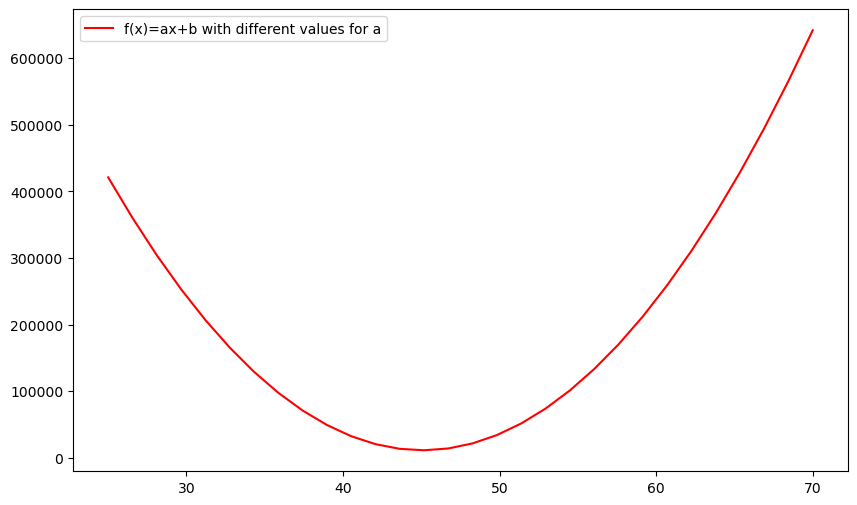

In [7]:
# Your code here
def sse_calculation(a):
    sugg_x = np.multiply(x_val, a) + 10
    return np.sum((y_val - sugg_x)**2)

x = np.linspace(min(x_val), max(x_val), 30)
y_result = []
lowest_y = None
lowest_a = None

for i in range(30):
    calc_y = sse_calculation(i/10)
    # print(calc_y)

    y_result.append(calc_y)

    if lowest_y is None:
        lowest_y = calc_y
        # print('lowest y: ',lowest_y)
    elif calc_y < lowest_y:
        lowest_y = calc_y
        lowest_a = i/10
    
plt.plot(x, y_result, label='f(x)=ax+b with different values for a', c='red')
print(f'"a" with lowest cost: {lowest_a} with an SSE of: {lowest_y}')

plt.legend()
plt.show()

### Exercise 6: draw the original dataset and the optimal solution
Again, as in exercise 3, plot the data, but now add the line with the (found) optimal solution (e.g. the function f(x)=_ax+b_ with _a_ the optimal value from exercise 5 and _b_ still being 0).

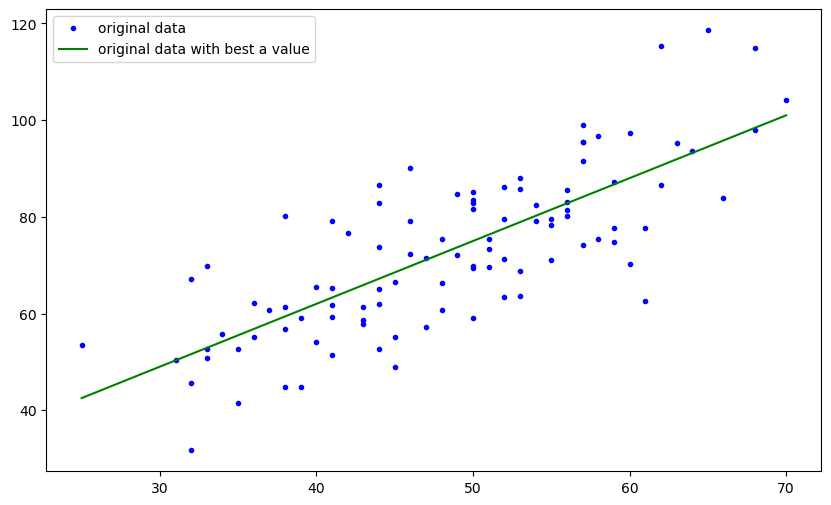

In [8]:
# Your code here
def g(x):
    return 1.3*x+10

# original plots
plt.plot(x_val, y_val, ls= '', color='blue', marker='.', label='original data')

# most optimal solution
plt.plot(x, g(x), c='green', label='original data with best a value')

plt.legend()
plt.show()

### Exercise 7: use NumPy...
Last week you learned to use NumPy and matrix operations. Use NumPy to rewrite the SSE cost function into _one_ NumPy statement.

In [9]:
# Your code here
def new_sse_calculation(a):
    return np.sum((y_val - (np.multiply(x_val, a) + 10))**2)

new_sse = new_sse_calculation(1.3)
print(new_sse)

11048.061077895412


### Exercise 8: now let the machine learning framework do all the work
Take a look at the LinearRegression component in the Scikit-Learn framework (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

See if you are able to find the optimal slope (called coefficient, the _a_ value) and the optimal intercept (the _b_ value) with the component.

Hint: you have to convert the x_val into a NumPy array using ``np.array(x_val).reshape(-1, 1)``

In [17]:
# Your code here
x_data = np.array(x_val).reshape(-1,1)
reg = LinearRegression().fit(x_data, y_val)
print('coefficient of determination:\t',reg.score(x_data, y_val))
print('optimal slope (a): \t\t',reg.coef_)
print('optimal intercept (b): \t\t',reg.intercept_)

coefficient of determination:	 0.5983852843880317
optimal slope (a): 		 [1.32095348]
optimal intercept (b): 		 8.655597470182641
